In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## 1. サンプルデータの用意
make_classification: サンプル分類データを生成するための関数（scikit-learnライブラリの一部）を使用して、不均衡なクラス分布を作成します。

In [61]:
# サンプルデータの作成
X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1], 
                           random_state=1)


【解説】**`make_classification()`**: 
- **引数の説明**:
  - **`n_samples=500`**: データのサンプル数を500に設定。
  - **`n_features=2`**: 特徴量（説明変数）の数を2に設定。
  - **`n_informative=2`**: そのうち、有益（分類に寄与する）な特徴量の数を2に設定。
  - **`n_redundant=0`**: 冗長（有益な特徴量の線形結合）な特徴量を0に設定。
  - **`n_clusters_per_class=1`**: 各クラスに1つのクラスタを設定。
  - **`weights=[0.9, 0.1]`**: クラス0とクラス1の割合をそれぞれ90%と10%に設定（不均衡なクラス分布を作成）。
  - **`random_state=42`**: ランダムシードを42に固定（再現性を確保）。
- **出力**:
  - **`X`**: 特徴量データ（500行×2列のNumPy配列）。
  - **`y`**: クラスラベル（0または1）のNumPy配列。


In [62]:
# 元データの分布を確認
print(pd.Series(y).value_counts())

0    447
1     53
Name: count, dtype: int64


In [55]:
X,y

(array([[ 9.15159253e-01, -1.23158162e+00],
        [ 1.29517708e-01, -2.20843366e+00],
        [-1.61291328e+00, -4.55077812e+00],
        [ 6.02314253e-01, -1.19682332e+00],
        [ 1.35262516e+00, -4.65299166e-01],
        [ 1.28276354e+00, -8.27695158e-01],
        [-2.17795059e-01, -3.36824395e+00],
        [ 1.64885252e+00,  2.74908943e-01],
        [ 8.39442572e-01, -8.70920015e-01],
        [ 5.45037607e-01,  1.79993549e+00],
        [ 4.73742526e-03,  1.04216320e+00],
        [ 2.13850830e-01, -2.12386591e+00],
        [ 2.13722836e+00,  5.43427947e-01],
        [ 4.67391568e-01, -1.40052335e+00],
        [ 1.89221910e-01, -2.04450501e+00],
        [ 1.15717490e+00, -1.28960068e+00],
        [ 2.70776119e+00,  1.06650487e+00],
        [ 1.16475675e+00, -4.40417205e-01],
        [-3.55245726e-01, -2.68654103e+00],
        [ 9.29108224e-01, -1.15418110e+00],
        [ 8.64692261e-01, -7.78202261e-01],
        [ 1.55789125e+00, -5.22211791e-01],
        [-5.71580301e-01, -3.465

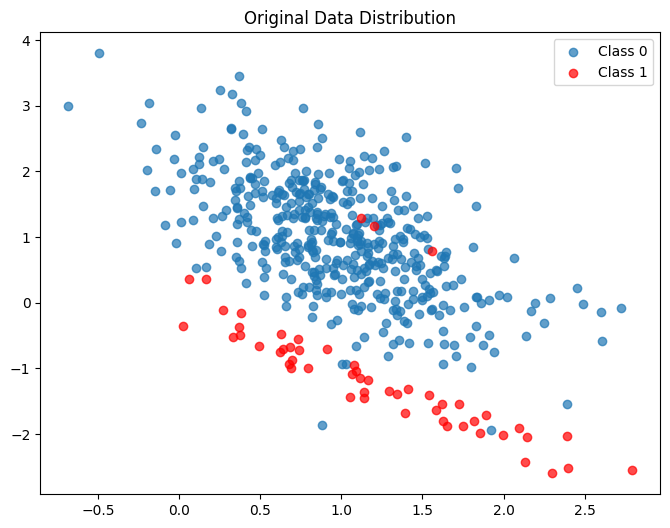

In [63]:
# データを可視化
def plot_data(X, y, title):
    plt.figure(figsize=(8, 6))

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.7)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.7, color='red')
    
    plt.title(title)
    plt.legend()
    plt.show()

plot_data(X, y, "Original Data Distribution")


In [64]:
# SMOTEの適用
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [65]:
# 新しいデータの分布を確認
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled class distribution:
1    447
0    447
Name: count, dtype: int64


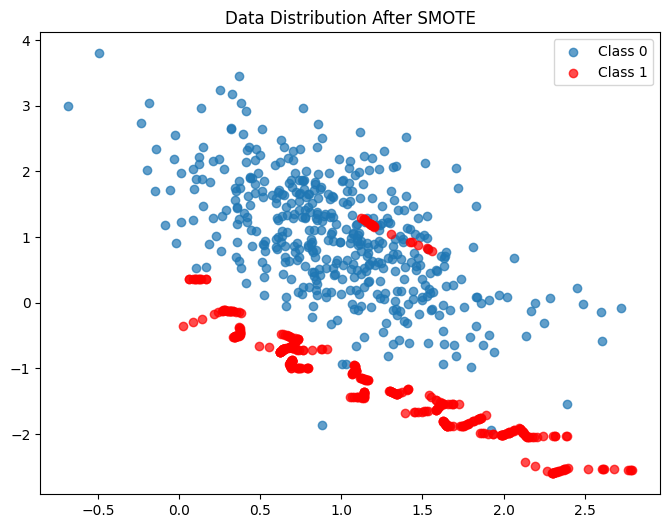

In [66]:
# リサンプリング後のデータを可視化
plot_data(X_resampled, y_resampled, "Data Distribution After SMOTE")

## 2. Pandas-DataFrameとして渡す場合

In [67]:
df = pd.DataFrame(X)
df_y = pd.Series(y)

In [68]:
df_y 

0      1
1      0
2      0
3      1
4      0
      ..
495    0
496    0
497    0
498    0
499    0
Length: 500, dtype: int32

In [69]:
# SMOTEの適用
smote2 = SMOTE(k_neighbors=1, random_state=42)
X_resampled_2, y_resampled_2 = smote2.fit_resample(df, df_y)

In [70]:
y_resampled_2.shape

(894,)

In [71]:
# 新しいデータの分布を確認
print("Resampled class distribution:")
print(y_resampled_2.value_counts())


Resampled class distribution:
1    447
0    447
Name: count, dtype: int64


In [72]:
y_resampled_2

0      1
1      0
2      0
3      1
4      0
      ..
889    1
890    1
891    1
892    1
893    1
Length: 894, dtype: int32

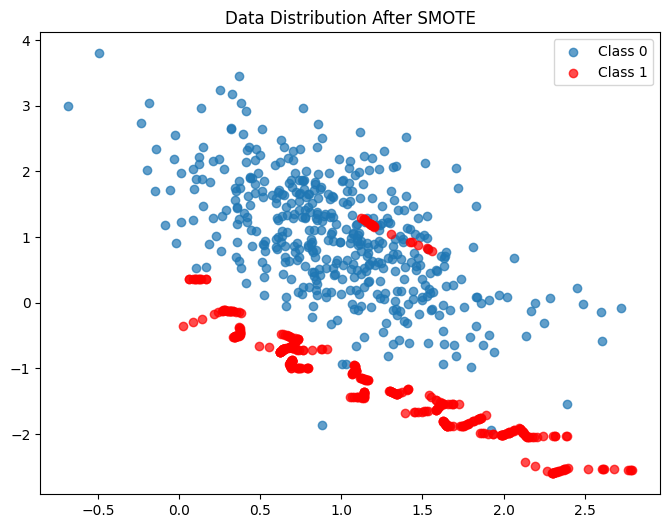

In [73]:
# リサンプリング後のデータを可視化
plot_data(X_resampled_2.values, y_resampled_2, "Data Distribution After SMOTE")

## 2. 特徴量として3変数の場合

In [74]:
# サンプルデータの作成
X, y = make_classification(n_samples=500, 
                           n_features=3, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_clusters_per_class=1,
                           weights=[0.9, 0.1], 
                           random_state=1)

In [76]:
# 元データの分布を確認
print(pd.Series(y).value_counts())

0    449
1     51
Name: count, dtype: int64


In [77]:
X,y

(array([[ 0.61183023,  1.00357976,  0.52265517],
        [ 1.25457354, -0.43984481,  0.3093178 ],
        [-0.68104437,  2.99972347,  0.85801145],
        ...,
        [ 1.36471818,  0.66652356, -0.40246762],
        [ 1.05843043,  0.51881735,  0.65217964],
        [ 1.01150549,  1.86409618, -0.87080155]]),
 array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0,

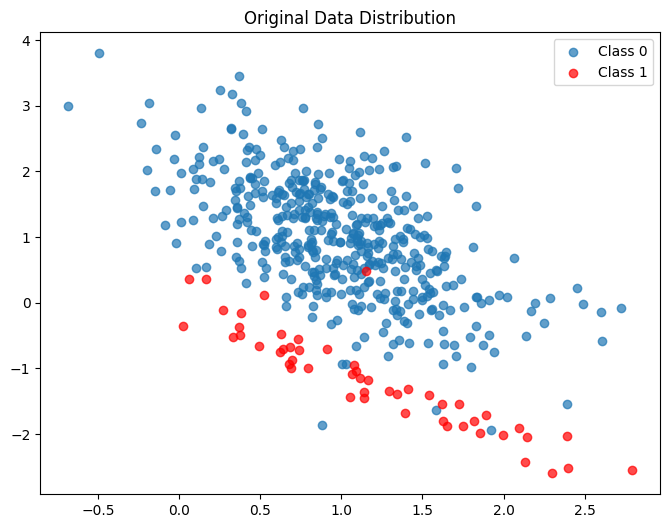

In [78]:
plot_data(X, y, "Original Data Distribution")

In [79]:
# SMOTEの適用
smote3 = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote3.fit_resample(X, y)

In [80]:
# 新しいデータの分布を確認
print("Resampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Resampled class distribution:
0    449
1    449
Name: count, dtype: int64


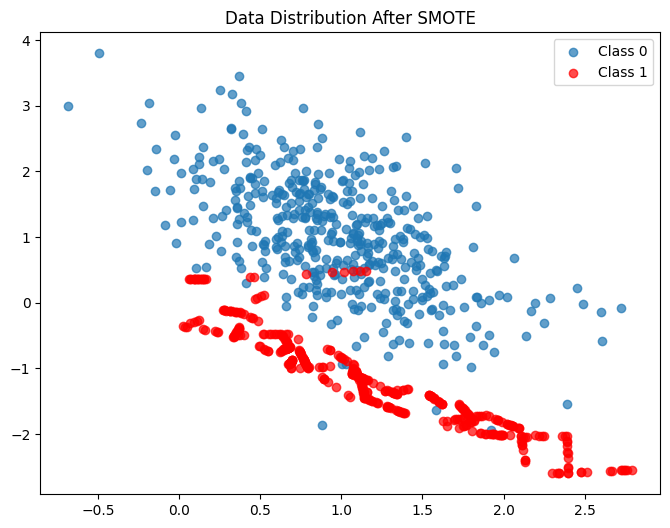

In [81]:
# リサンプリング後のデータを可視化
plot_data(X_resampled, y_resampled, "Data Distribution After SMOTE")